## Redes Neuronales (Neural Network)

Basándonos en la naturaleza, las redes neuronales son la representación habitual de lo que pensamos que es el cerebro: neuronas interconectadas con otras neuronas que forman una red.

- **Neurona**: Células nerviosas interconectadas en el cerebro que participan en el proceso y la transmisión de señales eléctricas y químicas.

Se describe una neurona como una simple compuerta lógica con salidas binarias, múltiples señales llegan a las dendritas, a continuación se integran en el cuerpo de la célula y, si la señal acumulada supera un umbral determinado, se genera una señal de salida que será transmitida por el axón.

- **Frank Rosenblatt** publicó el primer concepto de la regla de aprendizaje del perceptrón, basado en el modelo de la neurona MCP.

- Con esta regla, **Rosenblatt** propuso un algoritmo que podía aprender los coeficientes de peso óptimo que luego se multiplican con las características de entrada para tomar la decisión de si una neurona se activa o no.

- En otras palabras el perceptrón trabaja como un clasificador para predecir si un patrón pertenece a una clase o a otra.

### Componentes de una Neurona Artificial

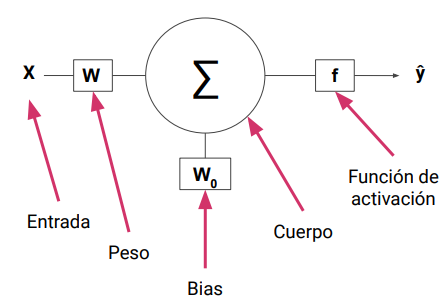

Una red neuronal no es más que un conjunto de capas conformado por neuronas, donde la primera capa es la **"Capa de Entrada"**, la última es la **"Capa de Salida"** y el resto son **"Capas Ocultas"**.

En una red neuronal, la salida de una capa es la entrada de otra, hasta llegar al final, donde acaba la red neural y tenemos un resultado.

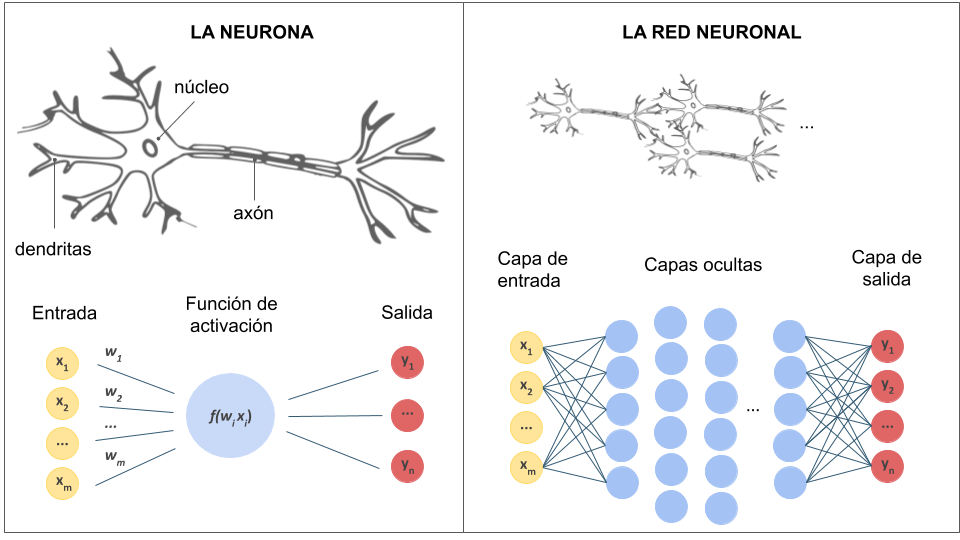

### Perceptrón

- El perceptrón es la versión más simple de una red neuronal ya que consta de una única capa que contiene una sola neurona.

- El resto de redes neuronales constan de decenas de capas que se comunican con las capas anteriores y estas a su vez comunican información a las neuronas de la capa siguiente.

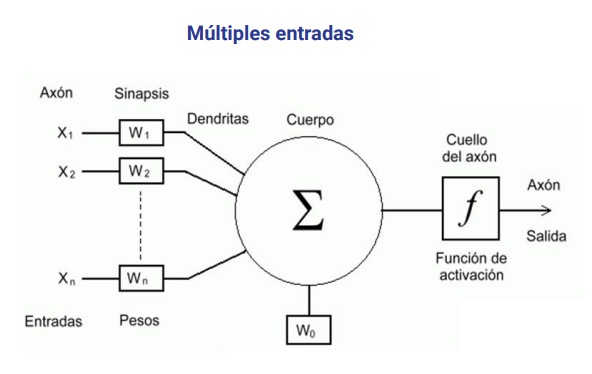

#### Ejemplo:

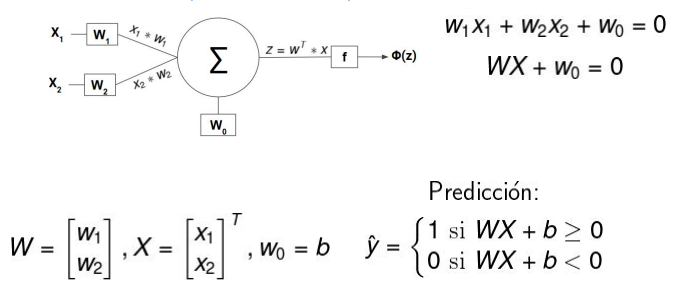

En la práctica, los pesos se inicializan en 0 o en valores muy cercanos a 0, dependiendo del modelo, estos pesos se modifican cada vez que el algoritmo aprende más de los datos.

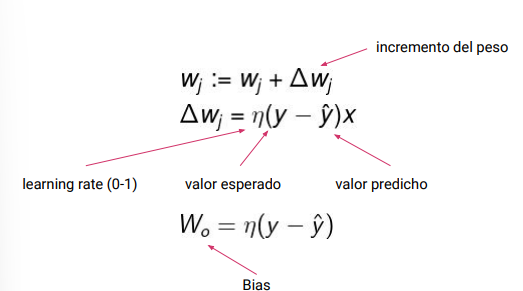

### Ejercicio:

Con los siguientes datos, realiza el algoritmo de perceptrón suponiendo que la entrada es una capa de 2 elementos y la salida es binaria.

1. Define una función que ayude con el calculo de la neurona (W*X + w0). 
2. Asigan valores aleatorios pequeños a los pesos.
3. Define una función para la función de activación. (Usa la función Escalón o la función Sigmoid)
4. Define una función que calcule el resultado del perceptrón.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Valores de Entradas 
X = np.array([[1, 1], [1, 2], [1, 3], [2, 1], [2, 2], [2, 3], [3, 1], [3, 2], [3, 3], [4, 1], [4, 2], [4, 3]])

# Valores de Salida
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

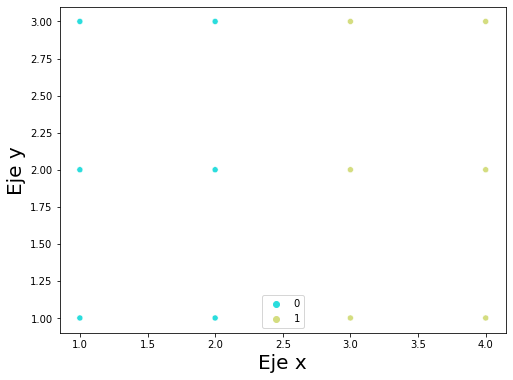

In [3]:
fig = plt.figure(figsize = (8, 6))

sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y, palette = "rainbow")

plt.xlabel("Eje x", fontsize = 20)
plt.ylabel("Eje y", fontsize = 20)
plt.show()

In [4]:
pesos = np.random.random(size = (2))/10

sesgo = np.random.random()
print(pesos, sesgo)

[0.05986196 0.02674028] 0.6844479313629096


In [5]:
def cuerpo(neurona, pesos, sesgo):
    return np.dot(neurona, pesos) + sesgo

In [6]:
def sigmoid(x):
    return 1/(1-np.exp(-x))

def predict_proba(x):
    return 0 if x <= .5 else 1

def escalon(x):
    return 0 if x <= 0 else 1

In [7]:
sigmoid(cuerpo(X[0], pesos, sesgo))

1.86055884500251

In [8]:
yhat = list()

for x in X:
    yhat.append(predict_proba((cuerpo(x, pesos, sesgo))))

yhat

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
accuracy_score(y, yhat)

0.5

### Perceptron con Sklearn

_**Documentacion:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html_

In [11]:
# Dataset
from sklearn.datasets import load_iris

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
X, y = load_iris(return_X_y = True)

X.shape, y.shape

((150, 4), (150,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, stratify = y)

X_train, X_test, y_train, y_test

(array([[5.1, 2.5, 3. , 1.1],
        [6.2, 2.2, 4.5, 1.5],
        [5.1, 3.8, 1.5, 0.3],
        [6.8, 3.2, 5.9, 2.3],
        [5.7, 2.8, 4.1, 1.3],
        [6.7, 3. , 5.2, 2.3],
        [4.9, 3.1, 1.5, 0.1],
        [5.1, 3.8, 1.6, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [7.1, 3. , 5.9, 2.1],
        [6.5, 3.2, 5.1, 2. ],
        [4.9, 3. , 1.4, 0.2],
        [5. , 3. , 1.6, 0.2],
        [6. , 2.9, 4.5, 1.5],
        [5.5, 2.4, 3.8, 1.1],
        [7.2, 3.2, 6. , 1.8],
        [5. , 3.4, 1.6, 0.4],
        [4.7, 3.2, 1.6, 0.2],
        [6.7, 3.3, 5.7, 2.5],
        [5.9, 3.2, 4.8, 1.8],
        [5.4, 3.4, 1.5, 0.4],
        [6.3, 2.7, 4.9, 1.8],
        [7.6, 3. , 6.6, 2.1],
        [7.7, 2.8, 6.7, 2. ],
        [5.7, 3. , 4.2, 1.2],
        [4.6, 3.4, 1.4, 0.3],
        [5.1, 3.7, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [6.9, 3.1, 4.9, 1.5],
        [5.5, 2.5, 4. , 1.3],
        [5.7, 4.4, 1.5, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.8, 2.7, 4.1, 1. ],
        [5

In [14]:
from sklearn.linear_model import Perceptron

In [15]:
model = Perceptron()

model.fit(X_train, y_train)

Perceptron()

In [16]:
y_hat = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_hat)}")

print(confusion_matrix(y_test, y_hat))

Accuracy: 0.8666666666666667
[[15  0  0]
 [ 1 13  1]
 [ 0  4 11]]


In [ ]:
################################################################################################################################

### Ejercicio:

- Usa las funciones hechas en clase para el calculo del perceptrón usando esta vez el dataset de la iris.

In [21]:
def softmax(x):
    x = np.array(x)
    return np.exp(x)/sum(np.exp(x))

In [24]:
x = np.array(X_train[0][0]*0.01 + X_train[0][1]*0.005 + X_train[0][2]*0.007 + X_train[0][3]*0.009 + 0.54)

In [25]:
x

array(0.6344)

In [31]:
c1 = X_train[0][0]*0.002 + X_train[0][1]*0.004 + X_train[0][2]*0.0015 + X_train[0][3]*0.0012 + 0.67
c2 = X_train[0][0]*0.025 + X_train[0][1]*0.0035 + X_train[0][2]*0.002 + X_train[0][3]*0.0015 + 0.47
c3 = X_train[0][0]*0.015 + X_train[0][1]*0.0045 + X_train[0][2]*0.0005 + X_train[0][3]*0.001 + 0.27
[c1, c2, c3]

(0.6960200000000001, 0.6139, 0.36035)

In [32]:
softmax([c1, c2, c3])

array([0.37935974, 0.34945155, 0.27118871])

In [36]:
train_probs = []
pesos1 = np.random.random(size = (4))/10
pesos2 = np.random.random(size = (4))/10
pesos3 = np.random.random(size = (4))/10
sesgo1 = np.random.random()
sesgo2 = np.random.random()
sesgo3 = np.random.random()
for x in X_train:
    c1 = cuerpo(x, pesos1,sesgo1)
    c2 = cuerpo(x, pesos2,sesgo2)
    c3 = cuerpo(x, pesos3,sesgo3)
    probs = softmax([c1, c2, c3])
    train_probs.append(probs)
train_probs

[array([0.36649953, 0.31583685, 0.31766363]),
 array([0.39359247, 0.30229496, 0.30411257]),
 array([0.32609251, 0.34144211, 0.33246538]),
 array([0.4046383 , 0.30418199, 0.29117971]),
 array([0.38114462, 0.31043896, 0.30841642]),
 array([0.39384551, 0.30941575, 0.29673874]),
 array([0.33495018, 0.3318814 , 0.33316841]),
 array([0.32808256, 0.33982667, 0.33209077]),
 array([0.33692595, 0.32961   , 0.33346405]),
 array([0.40637058, 0.30191826, 0.29171116]),
 array([0.39097306, 0.310432  , 0.29859494]),
 array([0.33405251, 0.33238461, 0.33356288]),
 array([0.33730391, 0.33065229, 0.3320438 ]),
 array([0.38603808, 0.30929357, 0.30466835]),
 array([0.38131612, 0.3075332 , 0.31115069]),
 array([0.40621392, 0.30174616, 0.29203992]),
 array([0.33243886, 0.33620748, 0.33135365]),
 array([0.33613819, 0.33184547, 0.33201634]),
 array([0.39945604, 0.30826309, 0.29228087]),
 array([0.38793069, 0.31061519, 0.30145413]),
 array([0.32924285, 0.33859734, 0.33215981]),
 array([0.39430263, 0.30535503, 0.

In [41]:
train_probs[0].argmax()

0

In [42]:
[i.argmax() for i in train_probs]

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0]